## Spatial Overlays

```{admonition} Summary
:class: hint

Just like in GIS software, Python allows you to perform spatial overlay operations, which combine multiple spatial datasets based on their locations. In this section explores different types of spatial operations using the `overlay()` function in `GeoPandas`.

```

Load required libraries: 

In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
from pathlib import Path

Define file paths: 

In [2]:
INPUT = Path.cwd().parents[0] / "00_data"
OUTPUT = Path.cwd().parents[0] / "out"

Load spatial data:

In [3]:
input_data = gp.read_file (OUTPUT / "clipped.shp")
overlay_data = gp.read_file(INPUT / "layers" / "border.shp")

The `overlay()`  function in GeoPandas allows different types of spatial operations, defined by the `how` parameter.

The following list explains available operations:
- `intersection` – Returns the overlapping (shared) area between two geometries.
- `union` - Merges both geometries into a single geometry.
- `difference` - Subtract second geometry from the first geometry.
- `symmetric_difference` - The areas that are in either of the two geometries, but not in both
- `identity`- Keeps the shape of the first geometry while adding overlapping parts from the second geometry.


```{admonition} Overlay Analysis
:class: tip
For more information, check the [GeoPandas spatial overlay documentation](https://geopandas.org/en/stable/docs/user_guide/set_operations.html).
```

Examples how to apply these operations: 

In [4]:
# Intersection: Find the overlapping (shared) area between input_data and overlay_data
out_intersection = gp.overlay(
    input_data, overlay_data,
    how='intersection')

# Union: Merge input_data and overlay_data into one geometry
out_union = gp.overlay(
    input_data, overlay_data,
    how='union')

# Difference: Subtract overlay_data from input_data
out_difference = gp.overlay(
    input_data, overlay_data,
    how='difference')

# Symmetric Difference: Get areas that are in either geometry, but not both
out_symmetric = gp.overlay(
    input_data, overlay_data,
    how='symmetric_difference')

# Identity: Retain the first geometry but mark overlapping areas with the second geometry
out_identity = gp.overlay(
    input_data, overlay_data,
    how='identity')

/tmp/ipykernel_2608/1074488158.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  out_union = gp.overlay(
/tmp/ipykernel_2608/1074488158.py:17: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  out_symmetric = gp.overlay(


The results can be inspected by using the `print` function, which will show the first few rows of the overlayed dataset.

Example:

In [6]:
print(out_symmetric.head())

  KS_IS CLC_st1 CLC18    CLC  Biotpkt201   Shape_Leng    Shape_Area  Id  \
0    SV     122  None    NaN    5.271487  1765.048621   6984.236836 NaN   
1    BL     322  None    NaN   18.055116   204.848619    582.329680 NaN   
2  None     142   142  142.0    7.000000   481.434416  11886.564349 NaN   
3  None     112   112  112.0    7.700000   113.533226    316.857160 NaN   
4    WP     122  None    NaN    5.271487   400.304410    591.147541 NaN   

                                            geometry  
0  POLYGON ((404092.96 5654379.53, 404098.204 565...  
1  POLYGON ((404867.05 5654106.356, 404862.483 56...  
2  POLYGON ((405339.13 5654136.481, 405172.058 56...  
3  POLYGON ((405337.399 5654208.987, 405336.192 5...  
4  POLYGON ((405336.192 5654214.027, 405335.975 5...  


The results can be visualized by using the `plot` function.

Example:

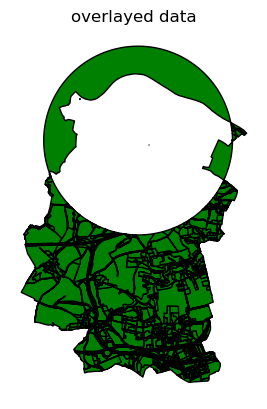

In [7]:
ax = out_symmetric.plot(
    color="green", 
    edgecolor="black")
ax.set_title("overlayed data")
ax.set_axis_off()